># EDA

Installing basic libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing data

In [4]:
from pandas import ExcelWriter
from pandas import ExcelFile

#dataset= pd.read_excel('/content/drive/My Drive/Deep_Learning/input_data.xlsx', sheet_name='Sheet1')
dataset= pd.read_excel('/content/sample_data/Copy of input_data.xlsx', sheet_name='Sheet1')

print("Column headings:")
print(dataset.columns)

Column headings:
Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')


In [5]:
# Making copy of data to work
df = dataset.copy()

Printing a few records

In [6]:
df.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

The information of Caller is not relevent. Hence, dropping this column

In [7]:
df.drop('Caller', axis = 1, inplace = True)
df.head(1)

Short description  ... Assignment group
0       login issue  ...            GRP_0

[1 rows x 3 columns]

>>> Let's explore the data

Shape of the data


In [8]:
df.shape

(8500, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


Checking for missing values

In [10]:
df[df.isna().any(axis = 1)]

Short description  ... Assignment group
2604                       NaN  ...           GRP_34
3383                       NaN  ...            GRP_0
3906                       NaN  ...            GRP_0
3910                       NaN  ...            GRP_0
3915                       NaN  ...            GRP_0
3921                       NaN  ...            GRP_0
3924                       NaN  ...            GRP_0
4341                       NaN  ...            GRP_0
4395  i am locked out of skype  ...            GRP_0

[9 rows x 3 columns]

>Where there is Short description missing we fill it with long description

>Where there is Description missing we fill it with short description.

>Where both short or long description is missing we will drop that record

In [11]:
list_index_sd = df[df['Short description'].isna() == True].index
list_index_sd
for i in list_index_sd:
  df.iloc[i]['Short description'] = df.iloc[i]['Description']

In [12]:
list_index_d = df[df['Description'].isna() == True].index
list_index_d
for i in list_index_d:
  df.iloc[i]['Description'] = df.iloc[i]['Short description']

In [13]:
df.isna().any()

Short description    False
Description          False
Assignment group     False
dtype: bool

Howmany total Number of Assignment groups ?

In [14]:
df['Assignment group'].nunique()
assignment_groups = df['Assignment group'].unique()
assignment_groups

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

Number of occurrence of each group

In [15]:
df['Assignment group'].value_counts().head(30)

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      39
GRP_30      39
GRP_42      37
Name: Assignment group, dtype: int64

Visualize Number of Assignment Group 

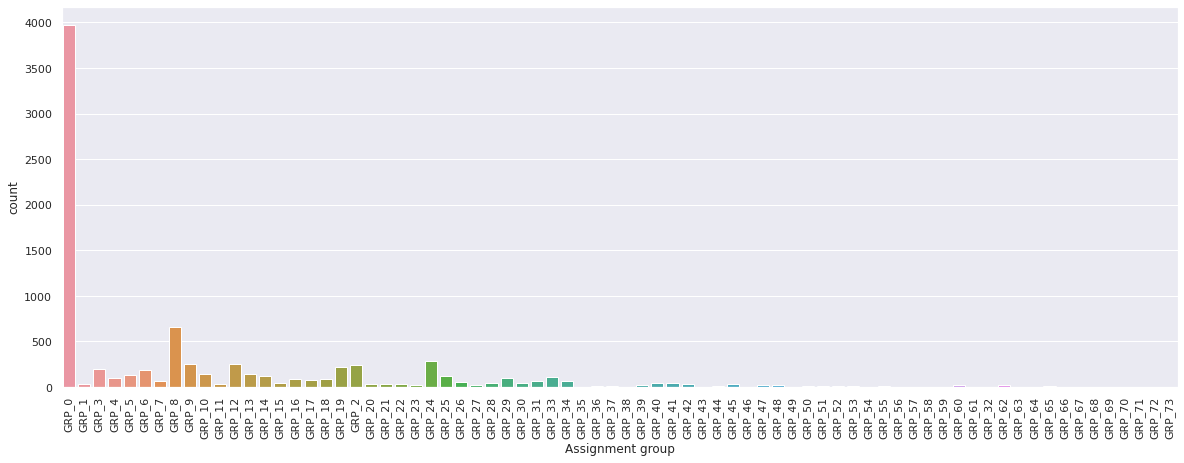

In [16]:
plt.figure(figsize = (20,7))
plt.xticks(rotation=90)
sns.countplot(df['Assignment group'])

>>**GRP_0 is assigned maximum number of times. GRP_8, GRP_24, GRP_9, GRP_12, GRP_19, GRP2** are among most assigned.

Exploring data

In [17]:
df.tail(50)

Short description  ... Assignment group
8450                          unable to connect to wifi  ...            GRP_0
8451                          password reset erp SID_34  ...            GRP_0
8452                 r: finished: start of s&op process  ...            GRP_0
8453                                      aw: SID_1 erp  ...            GRP_0
8454             erp & business_client password blocked  ...            GRP_0
8455  need teamviewer full version and visio applica...  ...           GRP_19
8456  calculation of the claim amount will make a mi...  ...           GRP_13
8457                    æ— æ³•ç™»é™†hr_toolè€ƒå‹¤ç³»ç»Ÿ  ...           GRP_30
8458                             windows account locked  ...            GRP_0
8459  erp crm complaint when is assigned generating ...  ...           GRP_15
8460             abended job in job_scheduler: Job_1148  ...            GRP_9
8461  reboot lhqsm286 (patent web uacyltoe hxgaycze ...  ...            GRP_8
8462             abended job in job_scheduler: Job_1141  ...            GRP_9
8463  kindly refer mail-renew account for visfgthal-...  ...            GRP_2
8464                                 SID_1 log in issue  ...            GRP_0
8465                                   vpn è¿žæŽ¥ä¸ä¸Š  ...           GRP_30
8466  abended job in job_scheduler: bkwin_HostName_7...  ...            GRP_8
8467  hi it help team,  please unblock my new compan...  ...            GRP_0
8468   can you unblock my account so i can use outlo...  ...            GRP_0
8469  plant_101 value added services - one day pick ...  ...           GRP_18
8470  please review your recent ticketing_tool ticke...  ...           GRP_16
8471                           ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥  ...           GRP_30
8472                                      ticket update  ...            GRP_0
8473              outlook freezing because of crm addin  ...            GRP_0
8474             inquiry about employee- shesyhur posrt  ...            GRP_0
8475               etime- time card update information.  ...            GRP_0
8476  supply_chain_software account unlock and passw...  ...            GRP_0
8477   can't login to bex analyzer through vpn - urgent  ...            GRP_0
8478                        beenefits access on oneteam  ...            GRP_0
8479                  unable to connect to HostName_776  ...            GRP_0
8480                      customer group enhanced field  ...            GRP_9
8481                                         ess portal  ...            GRP_9
8482                     robot HostName_776 is inactive  ...            GRP_8
8483    fw: case id [ref:_case-111121032:ref] :: others  ...            GRP_0
8484  please remove user hugcadrn ixhlwdgt (ralfteim...  ...            GRP_2
8485  ticket update on inc1538505 to user hbmwlprq i...  ...            GRP_0
8486                  ticket update on ticket_no0427635  ...            GRP_0
8487              telephony_software is missing from pc  ...            GRP_3
8488                                 erp account unlock  ...            GRP_0
8489                                     account locked  ...            GRP_0
8490                         check status in purchasing  ...           GRP_29
8491                                     vpn for laptop  ...           GRP_34
8492                 hr_tool etime option not visitble   ...            GRP_0
8493           erp fi  - ob09, two accounts to be added  ...           GRP_10
8494  tablet needs reimaged due to multiple issues w...  ...            GRP_3
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[50 rows x 3 columns]

Take a look at few short description

In [18]:
for index,text in enumerate(df['Short description'][20:35]):
  print('\nShort Description %d:\n'%(index+1),text)


Short Description 1:
 unable to check payslips

Short Description 2:
 vpn issue

Short Description 3:
 unable to connect to vpn

Short Description 4:
 user called for vendor phone number

Short Description 5:
 vpn not working

Short Description 6:
 erp SID_37 password reset 

Short Description 7:
 unable to login to hr_tool to check payslips

Short Description 8:
 account locked out

Short Description 9:
 unable to login to hr_tool

Short Description 10:
 unable to log in to erp SID_34 

Short Description 11:
 password reset for collaboration_platform

Short Description 12:
 reset  users

Short Description 13:
 duplication of network address.

Short Description 14:
 ess password reset

Short Description 15:
 unable to install flash player


Take a look at few description

In [19]:
for index,text in enumerate(df['Description'][20:35]):
  print('\n Description %d:\n'%(index+1),text)


 Description 1:
 unable to check payslips

 Description 2:
 

received from: ugephfta.hrbqkvij@gmail.com

hello helpdesk

i am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.

[cid:image001.jpg@01d233aa.3f618be0]

*********************

need help with your dynamics crm?
click here<

chat with a live agent regarding your dynamics crm questions now! click here<

best 

 Description 3:
 unable to connect to vpn

 Description 4:
 user called for vendor phone number

 Description 5:
 

received from: dceoufyz.saufqkmd@gmail.com

hello,

i'm not being able to connect to company network through the vpn. pls check.

cc: sir-i am not being able to upload as a result of no company network.



 Description 6:
 erp SID_37 password reset 

 Description 7:
 unable to login to hr_tool to check payslips

 Description 8:
 account locked out

 Description 9

Determine the languages used in the dataset

In [20]:
pip install langdetect

     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=dfc414ebd6cca9b260ef0f06b8f47835304b756e0fdd7c42ccdbb40566b86170
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
# df1 = df.Description.dropna(subset=['Description'])
# detect(elem) for elem in textlist if len(elem) > 50
# from langdetect import detect
# df['lang'] = df['Short description'].map(lambda x: detect(x)  if len(x )>1 else 'not detected')

In [21]:
# nwords_short_description --> Column defining number of words in 'Short description'
df['nwords_short_description'] = df['Short description'].apply(lambda x: len(str(x).split(" ")))


In [22]:
df[['Short description', 'nwords_short_description']].sort_values(by = 'nwords_short_description', ascending = False).head(5)

Short description  nwords_short_description
4385  pc set up for new employee -mghlisha.baranwfhr...                        41
1076  hello    on my order below.   i have 5  drop s...                        32
2881  i did a po and it received with no problem, i ...                        28
3907  i am not able to log into my vpn. when i am tr...                        28
6307  i have created 2 new material numbers but when...                        27

In [23]:
# top five description with least number of words
df[["Short description","nwords_short_description"]].sort_values(by = "nwords_short_description",ascending = True).head()

Short description  nwords_short_description
7682         discounts                         1
4821        chg0034110                         1
6227         vvdortddp                         1
2833               hsh                         1
7588   æ˜¾ç¤ºå™¨ä¸äº®                         1

In [24]:
# nwords_description --> Column defining number of words in 'Description'
df['nwords_description'] = df['Description'].apply(lambda x: len(str(x).split(" ")))

What are top 5 Description with maximum number of words


In [25]:
df[['Description', 'nwords_description']].sort_values(by = 'nwords_description', ascending = False).head(5)

Description  nwords_description
7345  we are seeing activity indicating the host at ...                1417
4087  source ip : 172.20.10.37 , 208.211.136.158\nsy...                1398
4089  source ip : 172.20.10.37 , 208.211.136.158\nsy...                1397
7989  source ip : 61.01.52.02617\r\nsystem name : lp...                1346
7995  source ip : 61.01.52.02617\r\nsystem name : lp...                1346

 What are top 5 Description with least number of words

In [26]:
df[['Description', 'nwords_description']].sort_values(by = 'nwords_description', ascending = True).head(5)

Description  nwords_description
2788                                                the                   1
3137  é‚®ç®±æ— æ³•å¯åŠ¨ï¼Œæç¤ºæ— æ³•åˆ›æ–°æ–°çš„å...                   1
5708                                                the                   1
3120               ç”µè„‘ç¡¬ç›˜æ•…éšœï¼Œè¯·æ±‚ç»´ä¿®ã€‚                   1
8168                                                the                   1

>>>Preprocessing the data 

Make 'Short description' and 'Description' into lower case

In [27]:
df["Short description"] = df["Short description"].astype(str).apply(lambda x: x.lower())
df["Short description"].head()

0                      login issue
1                          outlook
2               cant log in to vpn
3    unable to access hr_tool page
4                     skype error 
Name: Short description, dtype: object

In [28]:
df["Description"] = df["Description"].astype(str).apply(lambda x: x.lower())
df["Description"].head()

0    -verified user details.(employee# & manager na...
1    \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...
2    \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...
3                        unable to access hr_tool page
4                                         skype error 
Name: Description, dtype: object

Work in IT use naming conventions where special characters .,_:)(@; are widely used. Replacing them with a space 

In [29]:
df["Short description"] = df["Short description"].str.replace("[^.,_:)(@;\w\s]"," ")
df["Description"] = df["Description"].str.replace("[^.,_:)(@;\w\s]"," ")

Removing other punctuations

In [30]:
import re
import string
df['Short description'] = df['Short description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))
df['Description'] = df['Description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [31]:
df.tail(20)

Short description  ... nwords_description
8480                      customer group enhanced field  ...                 76
8481                                         ess portal  ...                 48
8482                     robot hostname 776 is inactive  ...                  4
8483    fw  case id  ref  case 111121032 ref     others  ...                 86
8484  please remove user hugcadrn ixhlwdgt  ralfteim...  ...                 15
8485  ticket update on inc1538505 to user hbmwlprq i...  ...                  8
8486                  ticket update on ticket no0427635  ...                  4
8487              telephony software is missing from pc  ...                128
8488                                 erp account unlock  ...                 13
8489                                     account locked  ...                  2
8490                         check status in purchasing  ...                 51
8491                                     vpn for laptop  ...                 15
8492                 hr tool etime option not visitble   ...                  6
8493           erp fi    ob09  two accounts to be added  ...                 46
8494  tablet needs reimaged due to multiple issues w...  ...                 11
8495                  emails not coming in from zz mail  ...                 16
8496                           telephony software issue  ...                  2
8497  vip2  windows password reset for tifpdchb pedx...  ...                  7
8498                     machine nã o estã  funcionando  ...                 16
8499  an mehreren pc s lassen sich verschiedene prgr...  ...                 11

[20 rows x 5 columns]

Remove digits and word containing digits


In [32]:
df['Short description'] = df['Short description'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['Description'] = df['Description'].apply(lambda x: re.sub('\w*\d\w*','', x))


Remove escape characters


In [33]:
regex = re.compile(r'[\n\r\t\'\b\\]')
df['Short description'] = df['Short description'].apply(lambda x: regex.sub(" ",x))
df['Description'] = df['Description'].apply(lambda x: regex.sub(" ",x))

Remove bad characters like 'å è ºï¼œæ ä šç µè å¼ æœºå¼ ä å ºæ'

In [34]:
#removing bad characters like å è ºï¼œæ ä šç µè å¼ æœºå¼ ä å ºæ
regex = re.compile(r'[^a-zA-z0-9 ]')
df['Description'] = df['Description'].apply(lambda x: regex.sub(" ",x))
df['Short description'] = df['Short description'].apply(lambda x: regex.sub(" ",x))


Removing extra spaces


In [35]:
df['Short description'] = df['Short description'].apply(lambda x: re.sub(' +',' ',x))
df['Description'] = df['Description'].apply(lambda x: re.sub(' +',' ',x))


Remove Stop words


In [36]:
## Importing stop words from nltk.corpus
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
stop = stopwords.words("english")

upating stop words list as words like gmail, com are too common.

In [38]:
newStopWords = ['com','gmail','hello','hi','hey','please','thank','you','thanks','regards']
stop.extend(newStopWords)

In [39]:
df["Short description"] = df["Short description"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df["Description"] = df["Description"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [40]:
  df.head()

Short description  ... nwords_description
0                 login issue  ...                 29
1                     outlook  ...                 23
2                cant log vpn  ...                  9
3  unable access hr tool page  ...                  5
4                 skype error  ...                  3

[5 rows x 5 columns]

Lemmatization


In [41]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [42]:
lemmatizer = WordNetLemmatizer()

In [43]:
df["Short description"] = df["Short description"].apply(lambda x: " ".join([lemmatizer.lemmatize(Word(myword)) for myword in x.split()]))
df["Description"] = df["Description"].apply(lambda x: " ".join([lemmatizer.lemmatize(Word(myword)) for myword in x.split()]))

In [44]:
df.head()

Short description  ... nwords_description
0                 login issue  ...                 29
1                     outlook  ...                 23
2                cant log vpn  ...                  9
3  unable access hr tool page  ...                  5
4                 skype error  ...                  3

[5 rows x 5 columns]

Creating clean dataframe with merging 'Short description' and 'Description' and taking only unique words from them


In [45]:
df['temp'] = df['Short description']+" "+df['Description']

In [46]:
df['temp'].head()

0    login issue verified user detail employee mana...
1    outlook received hmjdrvpb komuaywn team meetin...
2    cant log vpn received eylqgodm ybqkwiam cannot...
3    unable access hr tool page unable access hr to...
4                              skype error skype error
Name: temp, dtype: object

In [47]:
from collections import Counter 
  
def remov_duplicates(input): 
  
    # split input string separated by space 
    input = input.split(" ") 
  
    # joins two adjacent elements in iterable way 
    for i in range(0, len(input)): 
        input[i] = "".join(input[i]) 
  
    # now create dictionary using counter method 
    # which will have strings as key and their  
    # frequencies as value 
    UniqW = Counter(input) 
  
    # joins two adjacent elements in iterable way 
    s = " ".join(UniqW.keys()) 
    return s

In [48]:
# remov_duplicates(df[0:1]['temp'].str)

In [49]:
df['final_description'] = df['temp'].apply(lambda x: remov_duplicates(x))

In [50]:
df.drop('temp', axis = 1, inplace = True)

In [51]:
df['final_description'].tail()

8495    email coming zz mail received avglmrts vhqmtiu...
8496                             telephony software issue
8497              window password reset tifpdchb pedxruyf
8498    machine n est funcionando unable access utilit...
8499    mehreren pc lassen sich verschiedene prgramdnt...
Name: final_description, dtype: object

In [52]:
# from textblob import TextBlob
# df['final_description'].map(lambda x: TextBlob(df.iloc[0]['final_description']).detect_language())

In [53]:
### Most frequent words in short description
most_freq_words = pd.Series(" ".join(df["final_description"]).split()).value_counts()
most_freq_words.head(20)

received      2335
tool          1893
company       1841
erp           1082
password      1056
job           1028
monitoring     983
scheduler      969
issue          969
failed         880
unable         879
reset          862
user           818
email          747
sid            734
access         699
error          690
account        680
need           659
working        615
dtype: int64

In [54]:
### Least frequent words in short description
least_freq_words =  pd.Series(" ".join(df["final_description"]).split()).value_counts().sort_values(ascending = True)
least_freq_words.head(10)

fqhlvcxn          1
knighdjhtyt       1
ouutlook          1
marfhtyios        1
kzvbr             1
xqbevoic          1
bengtjamin        1
customermaster    1
aqjdvexo          1
lepkbgix          1
dtype: int64

In [55]:
# TOkenize
from nltk import word_tokenize,sent_tokenize

In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [57]:
df["final_description"].apply(lambda x: word_tokenize(x))

0       [login, issue, verified, user, detail, employe...
1       [outlook, received, hmjdrvpb, komuaywn, team, ...
2       [cant, log, vpn, received, eylqgodm, ybqkwiam,...
3                        [unable, access, hr, tool, page]
4                                          [skype, error]
                              ...                        
8495    [email, coming, zz, mail, received, avglmrts, ...
8496                         [telephony, software, issue]
8497        [window, password, reset, tifpdchb, pedxruyf]
8498    [machine, n, est, funcionando, unable, access,...
8499    [mehreren, pc, lassen, sich, verschiedene, prg...
Name: final_description, Length: 8500, dtype: object

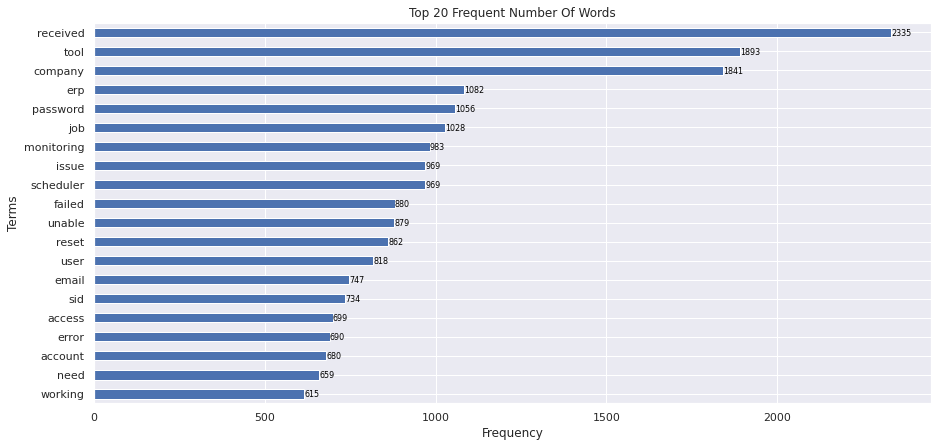

In [58]:
### Analyzing top 20 frequent words

plt.figure(figsize = (15,7))
sd_freq_plot = most_freq_words.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Number Of Words")

plt.style.use("ggplot")
sd_freq_plot.set_xlabel("Frequency")
sd_freq_plot.set_ylabel("Terms")

totals = []
for i in sd_freq_plot.patches:
    totals.append(i.get_width())

for i in sd_freq_plot.patches:
    sd_freq_plot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),fontsize = 8,color= 'black')
    

Bigrams

In [59]:
pip install TextBlob

In [60]:
# creating bigrams
from textblob import TextBlob
bigrams = TextBlob(" ".join(df["final_description"])).ngrams(2)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df["final_description"])
frequencies = sum(sparse_matrix).toarray()[0]
bi_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [62]:
bi_grams_df.sort_values(by = "frequency",ascending=False).head(20)

frequency
received monitoring           961
monitoring tool               919
tool company                  909
scheduler received            889
failed scheduler              809
job failed                    476
password reset                346
erp sid                       299
reset password                237
engineering tool              214
cid png                       212
management tool               211
account locked                206
collaboration platform        186
internet explorer             184
browser microsoft             167
telephone summary             167
language browser              167
explorer email                166
customer number               166

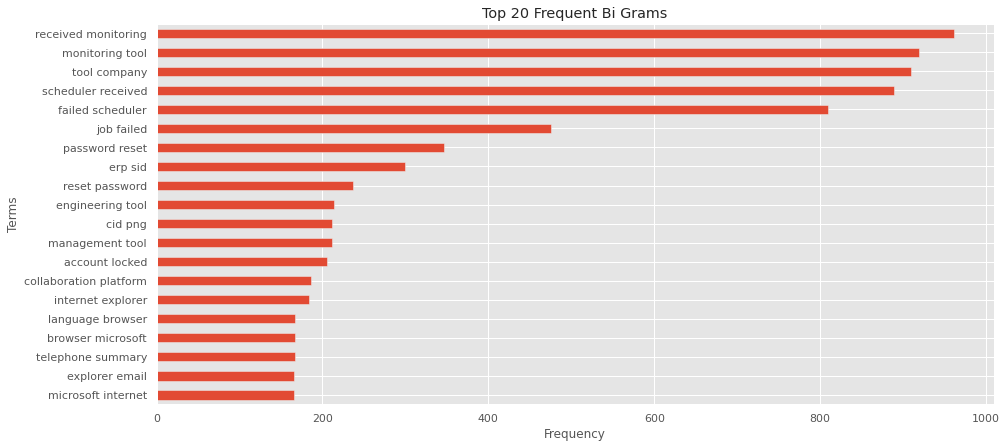

In [63]:
### Analyzing top 20 frequent BI Gram words
plt.figure(figsize = (15,7))
plt.style.use("ggplot")
plt.xlabel("Frequency",)
plt.ylabel("Terms")
top20_bigrams = bi_grams_df["frequency"].sort_values(ascending = False).head(20)

top20_bigrams.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Bi Grams")


Creating Document Term Matrix

In [64]:
df_grouped=df[['Assignment group','final_description']].groupby(by='Assignment group').agg(lambda x:' '.join(x))
df_grouped.head()

final_description
Assignment group                                                   
GRP_0             login issue verified user detail employee mana...
GRP_1             event critical hostname company value mountpoi...
GRP_10            job hr payroll na failed scheduler received mo...
GRP_11            engineering tool drawing original pdf format s...
GRP_12            c label sys server space consumed available g ...

In [65]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['final_description'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

aa  aacount  aao  ab  ...  zyrnqiav  zywoxerf  zz  zzcmpgn
Assignment group                        ...                                 
GRP_0              0        0    0   1  ...         1         5   1        0
GRP_1              0        0    0   0  ...         0         0   0        0
GRP_10             0        1    0   0  ...         0         0   0        0

[3 rows x 13682 columns]

In [66]:
pip install wordcloud

let’s start by looking at the common words present in the reviews for each product.

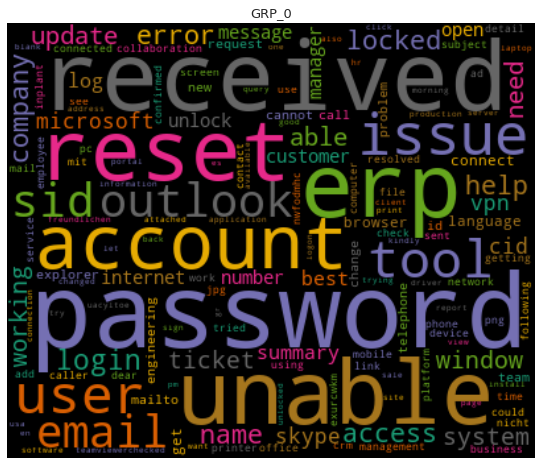

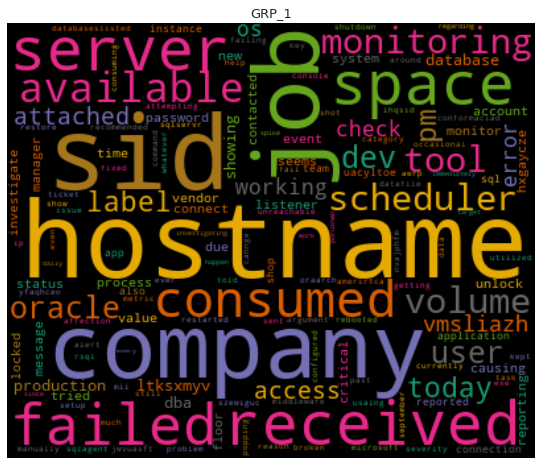

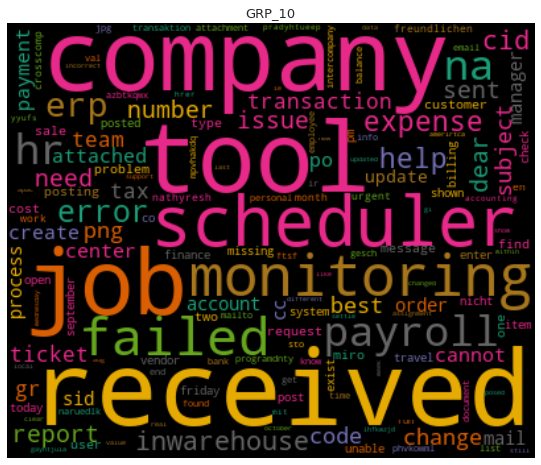

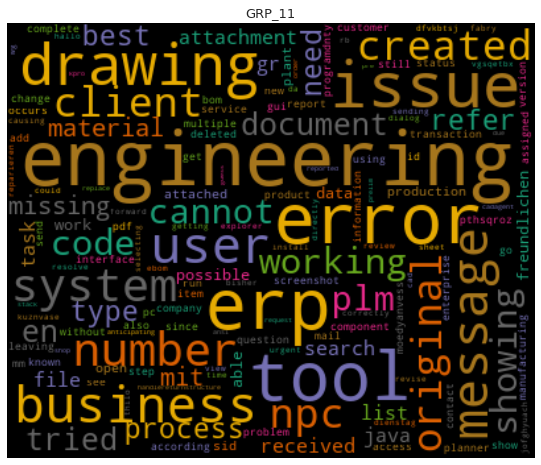

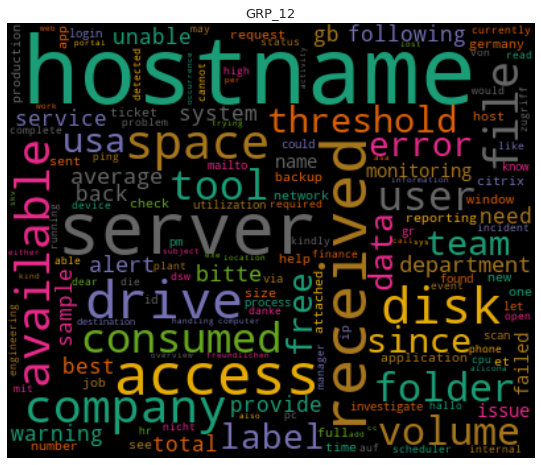

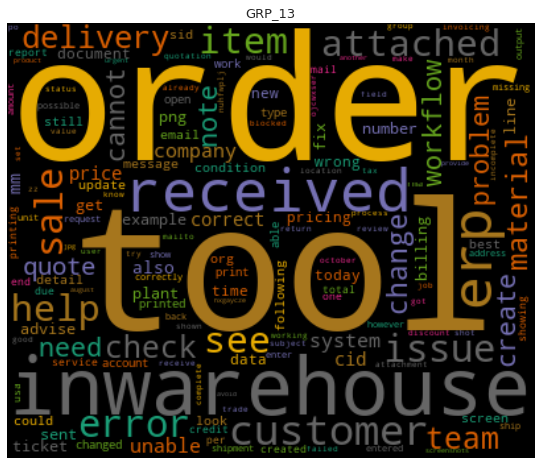

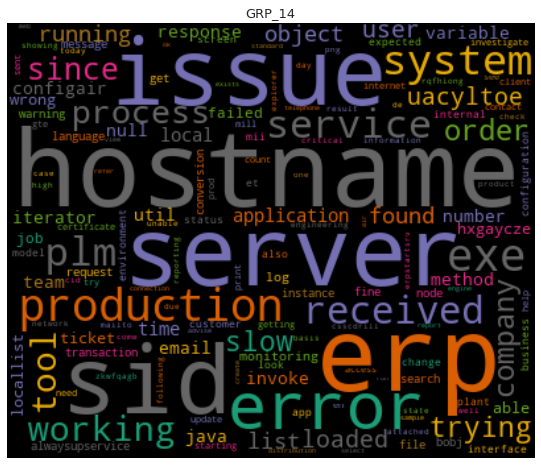

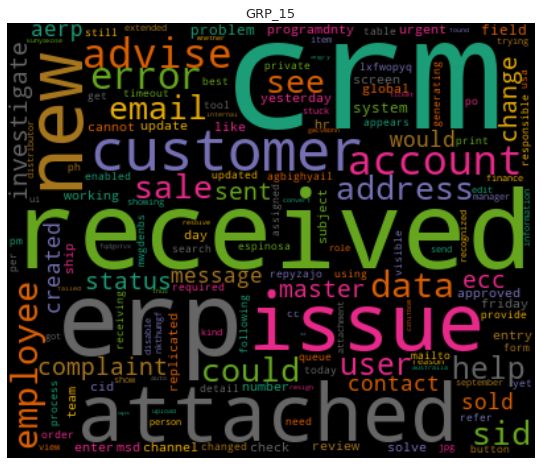

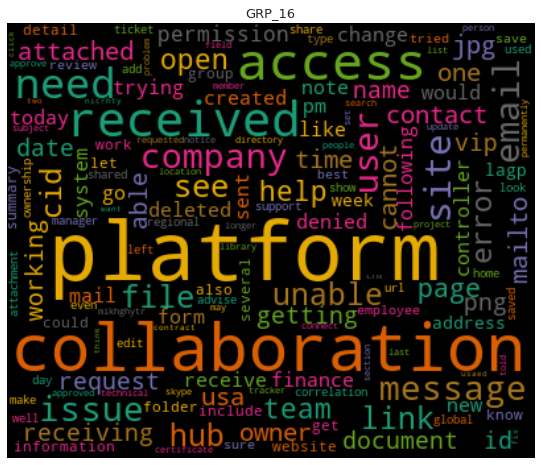

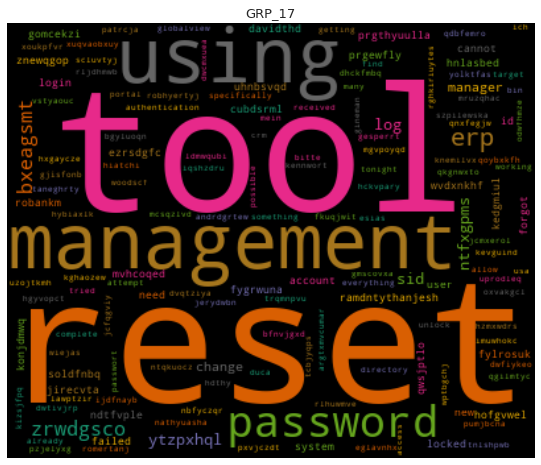

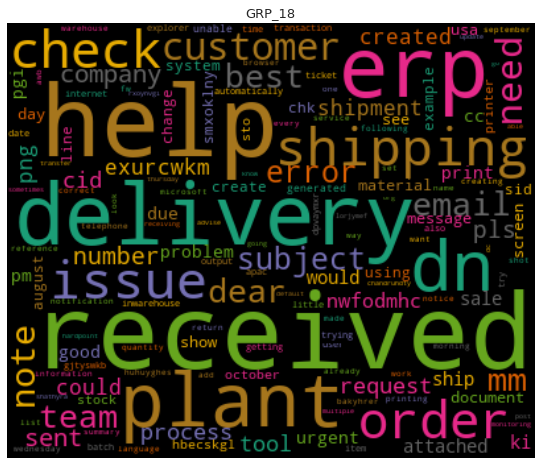

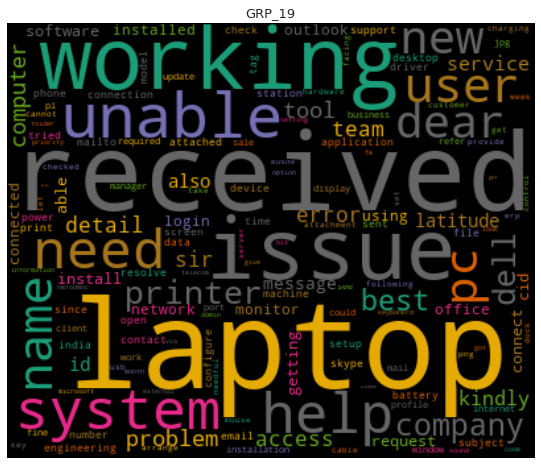

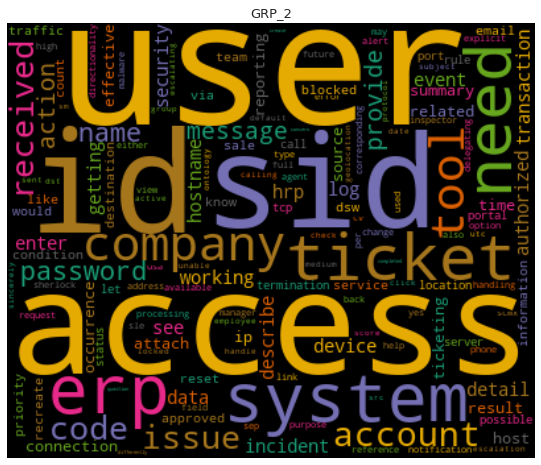

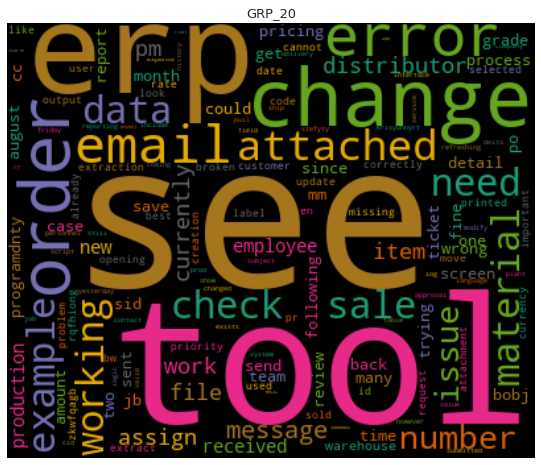

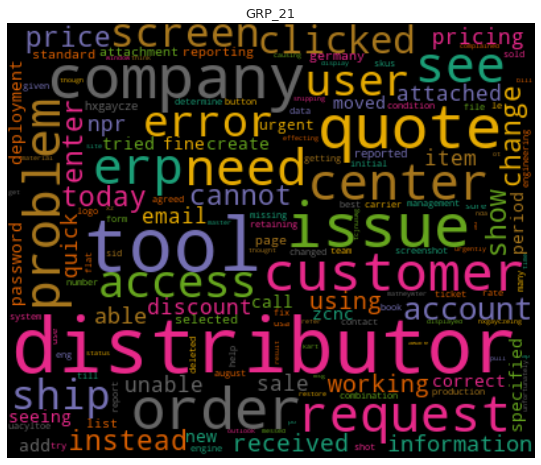

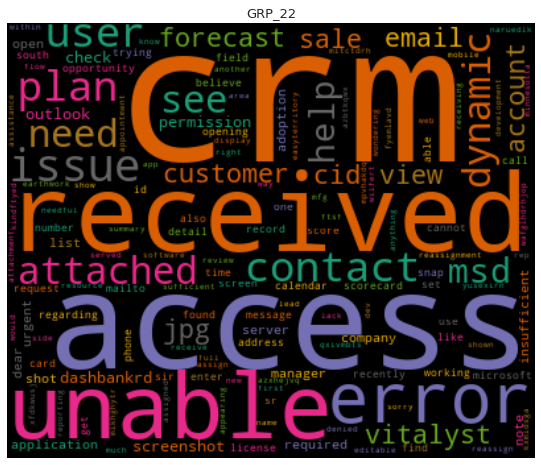

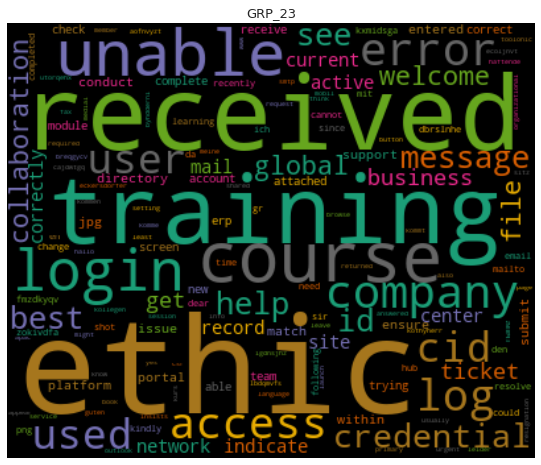

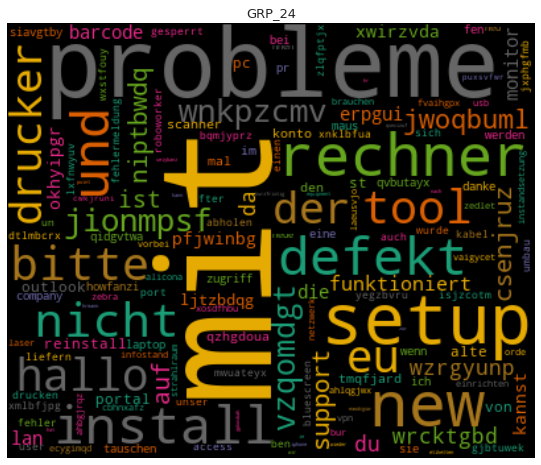

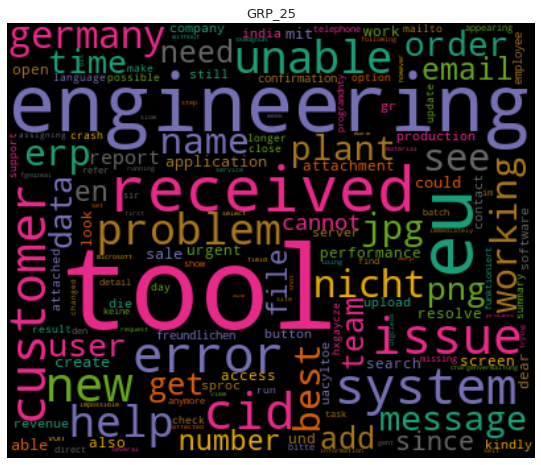

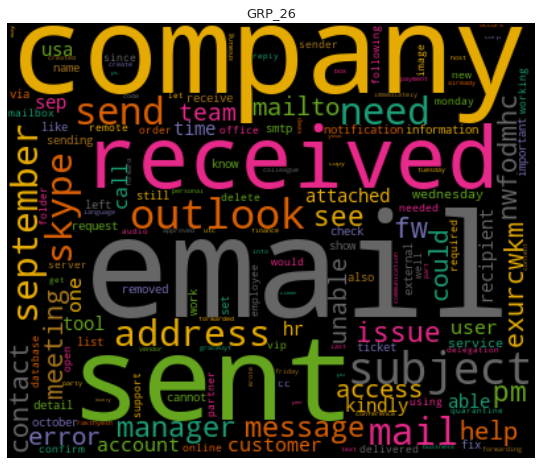

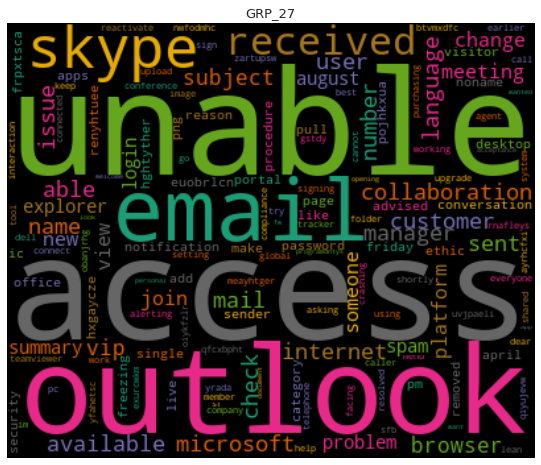

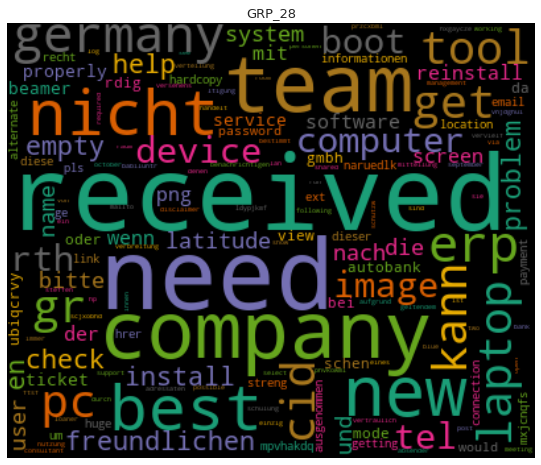

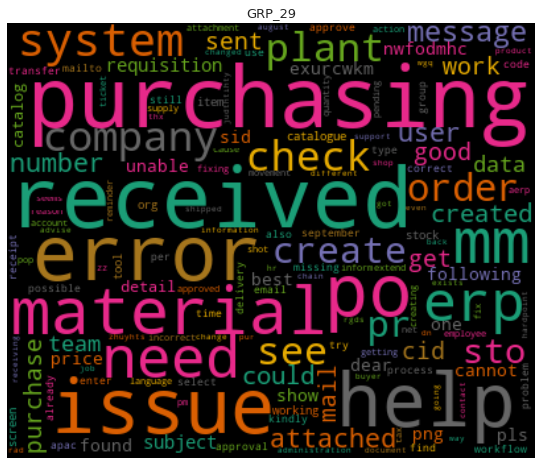

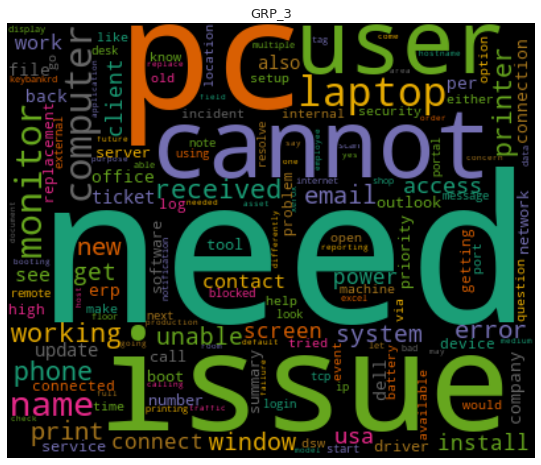

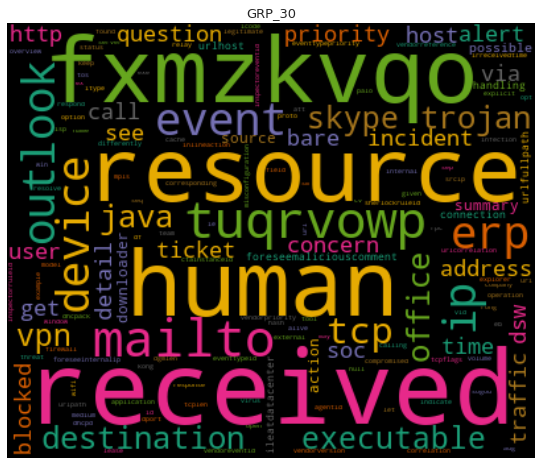

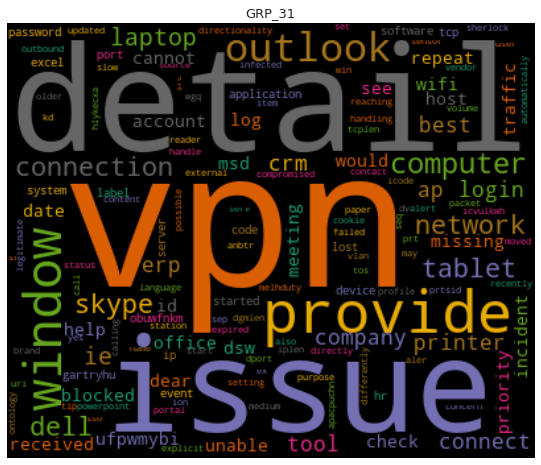

ZeroDivisionError: ignored

In [67]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [68]:
df.head()

Short description  ...                                  final_description
0                 login issue  ...  login issue verified user detail employee mana...
1                     outlook  ...  outlook received hmjdrvpb komuaywn team meetin...
2                cant log vpn  ...  cant log vpn received eylqgodm ybqkwiam cannot...
3  unable access hr tool page  ...                         unable access hr tool page
4                 skype error  ...                                        skype error

[5 rows x 6 columns]

In [69]:
df_model_1 = df[['final_description','Assignment group']]

    ULM Fit

In [70]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_model_1['Assignment group'])
df_model_1['Assignment group'] = le.transform(df_model_1['Assignment group'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [94]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html


In [95]:
from sklearn.model_selection import train_test_split
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io

ULM fit accepts data as dataframes hence converting arrays to DFs

In [92]:
def ulm_fit(df,encoder_name,drop_out,epochs):
  X = df['final_description']
  y = df['Assignment group']
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
  df_trn = pd.DataFrame()
  df_val = pd.DataFrame()
  df_trn['Desc'] = X_train
  df_trn['Assignment group'] = y_train
  df_val['Desc'] = X_val
  df_val['Assignment group'] = y_val
  data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")
  data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)
  learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=drop_out)
  learn.fit_one_cycle(1, 1e-2)
  learn.save_encoder('ft_enc')
  learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=drop_out, metrics=accuracy)
  learn.load_encoder('ft_enc')
  learn.fit_one_cycle(epochs, 1e-2)

In [98]:
ulm_fit(df_model_1,'fst_1',0.5,4)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
ap usa training room disassociated controller name company wlc received sthyuraj sektyhar alarm timestamp august edt device severity critical, forgot erp password received uwlnpscr lvkujfse dear could help reset, plm conversion server reporting warning status hostname investigate, unable create delivery mm print n post detail information see attachment provide following order number material item warehouse location plant issue description error message, reactivate id tempuser sid erp production pls reset password prodn...
  if getattr(ds, 'warn', False): warn(ds.warn)


Trying ULM fit for specific groups and neglecting groups that have less then 10 records

In [86]:
grouped = df_model_1.groupby('Assignment group').count()
grouped = grouped.reset_index()
grouped['Assignment group'][grouped['final_description'] < 10]

26    26
29    29
32    32
38    38
41    41
44    44
47    47
48    48
50    50
51    51
52    52
53    53
54    54
55    55
58    58
60    60
61    61
63    63
64    64
65    65
66    66
68    68
69    69
70    70
71    71
Name: Assignment group, dtype: int64

In [88]:
df_model_2 = df_model_1.groupby('Assignment group').filter(lambda x : len(x)>10).reset_index()

In [90]:
df_model_2.drop(columns=['index'],inplace = True)

In [99]:
df_model_2.shape

(8413, 2)

In [101]:
X = df_model_2['final_description']
y = df_model_2['Assignment group']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
df_trn = pd.DataFrame()
df_val = pd.DataFrame()
df_trn['Desc'] = X_train
df_trn['Assignment group'] = y_train
df_val['Desc'] = X_val
df_val['Assignment group'] = y_val
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)
learn_1 = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn_1.fit_one_cycle(1, 1e-2)
learn_1.save_encoder('ft_enc_1')
learn_1 = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn_1.load_encoder('ft_enc_1')
learn_1.fit_one_cycle(4, 1e-2)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
ap usa training room disassociated controller name company wlc received sthyuraj sektyhar alarm timestamp august edt device severity critical, able create delivery sto could verify apo assing supply chain group, telephone dial tone cannot pick warehouse tool mail message, plm conversion server reporting warning status hostname investigate, unable create delivery mm print n post detail information see attachment provide following order number material item warehouse location plant issue description error message...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [104]:
X = df_model_2['final_description']
y = df_model_2['Assignment group']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
unique_classes = df_model_2['Assignment group'].unique()

In [112]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = nb.predict(X_val)

print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

accuracy 0.5585163845876846
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1298
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        57
           3       0.00      0.00      0.00        11
           4       0.56      0.14      0.23        70
           5       0.00      0.00      0.00        51
           6       0.00      0.00      0.00        44
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00        23
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00        66
          12       0.44      0.05      0.10        73
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00        10

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

train_size = int(len(df_model_2) * .7)
train_posts = df_model_2['final_description'][:train_size]
train_tags = df_model_2['Assignment group'][:train_size]

test_posts = df_model_2['final_description'][train_size:]
test_tags = df_model_2['Assignment group'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = train_tags
y_test = test_tags

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 32
epochs = 10

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/10
166/166 [==============================] - 1s 7ms/step - loss: 2.3443 - accuracy: 0.5394 - val_loss: 1.7021 - val_accuracy: 0.5942
Epoch 2/10
166/166 [==============================] - 1s 6ms/step - loss: 1.3807 - accuracy: 0.6521 - val_loss: 1.4279 - val_accuracy: 0.6367
Epoch 3/10
166/166 [==============================] - 1s 6ms/step - loss: 1.0505 - accuracy: 0.7183 - val_loss: 1.3274 - val_accuracy: 0.6520
Epoch 4/10
166/166 [==============================] - 1s 6ms/step - loss: 0.8520 - accuracy: 0.7692 - val_loss: 1.2730 - val_accuracy: 0.6655
Epoch 5/10
166/166 [==============================] - 1s 6ms/step - loss: 0.7188 - accuracy: 0.7889 - val_loss: 1.2973 - val_accuracy: 0.6452
Epoch 6/10
166/166 [==============================] - 1s 6ms/step - loss: 0.6340 - accuracy: 0.8098 - val_loss: 1.2613 - val_accuracy: 0.6553
Epoch 7/10
166/166 [==============================] - 1s 6ms/step - loss: 0.5541 - accuracy: 0.8338 - val_loss: 1.3209 - val_accuracy: 0.6452
Epoch 

In [121]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

79/79 [==============================] - 0s 2ms/step - loss: 1.4741 - accuracy: 0.6228
Test accuracy: 0.6228209137916565


Implementing Fasttext

In [122]:
!pip install fasttext

     |████████████████████████████████| 71kB 1.9MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3015939 sha256=637ec1b8efa9733ddaa43e09d071f9a00e81a4f1dcbfd86a8db904229f9d3bc8
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [141]:
df_model_fasttext = df[['Assignment group','final_description']]
df_model_fasttext = df_model_fasttext.groupby('Assignment group').filter(lambda x : len(x)>10).reset_index()
df_model_fasttext.drop(columns=['index'],inplace=True)

In [142]:
for i,j in enumerate(df_model_fasttext['Assignment group']):
  df_model_fasttext['Assignment group'][i] = "__label__"+j

In [143]:
df_model_fasttext.head()

Assignment group                                  final_description
0   __label__GRP_0  login issue verified user detail employee mana...
1   __label__GRP_0  outlook received hmjdrvpb komuaywn team meetin...
2   __label__GRP_0  cant log vpn received eylqgodm ybqkwiam cannot...
3   __label__GRP_0                         unable access hr tool page
4   __label__GRP_0                                        skype error

In [144]:
df_model_fasttext.shape

(8413, 2)

In [145]:
df_model_fasttext = df_model_fasttext.sample(frac = 1) 

In [146]:
df_model_fasttext.head()

Assignment group                                  final_description
4812  __label__GRP_40  account number incorrect urgent trurthyuft per...
4757   __label__GRP_0                                     account locked
6868   __label__GRP_0                                      update office
5585  __label__GRP_16  unable connect knowledge center commstorage pr...
316    __label__GRP_0                             erp sid password reset

In [151]:
df_model_fasttext.to_csv(r'/content/sample_data/final_fft_data.txt',index=False, sep=' ', header=False)

In [154]:
!head /content/sample_data/final_fft_data.txt

__label__GRP_40 "account number incorrect urgent trurthyuft per converstion shatryung screen teamviewer morning shot issue look opportstorage product mdosid correct customer opp created problem selecting opportunity recently able choose need close today"
__label__GRP_0 "account locked"
__label__GRP_0 "update office"
__label__GRP_16 "unable connect knowledge center commstorage product tab"
__label__GRP_0 "erp sid password reset"
__label__GRP_9 "abended job scheduler received monitoring tool company"
__label__GRP_19 "id printer issue working"
__label__GRP_9 "job failed scheduler received monitoring tool company"
__label__GRP_10 "user tempuser changed layout default setting everyone erp sid finance jinf tried figure chosen know exactly really happens time aware set"
__label__GRP_42 "barcode ber word etikettendruck ich im eine zahlen buchstaben drucken al mit der schriftart cosid geht dy nicht da e einer scanpistole lesen kann phone"


In [155]:
import os

In [156]:
os.chdir('/content/sample_data')

In [157]:
!head -n 6000 final_fft_data.txt > tickets.train.txt

In [158]:
!tail -n 2413 final_fft_data.txt > tickets.valid.txt

In [149]:
import fasttext

In [161]:
os.getcwd()

'/content/sample_data'

In [162]:
model = fasttext.train_supervised(input="tickets.train.txt", lr=1.0,epoch=10,wordNgrams=2,loss='hs')

In [163]:
model.test("tickets.valid.txt",k=5)

(2413, 0.19411708345309955, 0.8396187318690427)

In [164]:
from keras.preprocessing import text,sequence
max_word_limit = 10000
t = text.Tokenizer(num_words=max_word_limit)
t.fit_on_texts(df_model_fasttext['final_description'].values)
X = t.texts_to_sequences(df_model_fasttext['final_description'].values)

In [165]:
print(X)

[[18, 40, 524, 183, 2246, 196, 6083, 1437, 98, 276, 210, 309, 9, 205, 1358, 321, 6084, 269, 41, 6085, 237, 51, 1806, 1231, 552, 29, 1438, 19, 553, 189], [18, 35], [38, 136], [11, 78, 1359, 244, 2574, 321, 554], [4, 15, 5, 12], [140, 6, 8, 1, 7, 2, 3], [42, 112, 9, 20], [6, 10, 8, 1, 7, 2, 3], [13, 3105, 188, 3106, 356, 322, 1548, 4, 15, 499, 6086, 157, 1439, 3107, 153, 4071, 1360, 798, 45, 1440, 216], [1299, 1170, 555, 6087, 389, 335, 890, 4072, 4073, 1669, 1999, 71, 197, 6088, 6089, 862, 4074, 114, 304, 91, 2247, 6090, 3108, 287, 33], [112, 51, 9, 126, 282, 212, 265, 714, 142, 127, 931, 162, 336, 22, 29, 206, 379, 987, 245, 196, 715, 1123, 24, 264, 323, 587, 602, 2248, 1670, 754, 440, 180, 278, 222, 324, 256, 38, 372, 380, 248, 158, 79, 433, 932, 390, 45, 1549, 17, 44, 49, 240, 564, 258, 603, 381, 70, 343, 14, 288, 555, 316, 233, 2, 176, 178, 128, 75, 1807, 60, 102, 157, 23, 121, 198, 4, 1361, 25, 799, 588, 643, 37, 92, 988, 305, 412, 15, 362, 441, 513, 1019, 355, 604, 373, 413, 423, 

In [166]:
max_features = 10000
maxlen = 50
embedding_size = 200

In [167]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data = X
train_data = np.array(pad_sequences(train_data ,maxlen=maxlen, padding="post", value=0))

In [168]:
train_data.shape

(8413, 50)

In [169]:
train_data[0]

array([  18,   40,  524,  183, 2246,  196, 6083, 1437,   98,  276,  210,  309,    9,  205, 1358,  321, 6084,  269,
         41, 6085,  237,   51, 1806, 1231,  552,   29, 1438,   19,  553,  189,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [170]:
t.word_index

{'received': 1,
 'tool': 2,
 'company': 3,
 'erp': 4,
 'password': 5,
 'job': 6,
 'monitoring': 7,
 'scheduler': 8,
 'issue': 9,
 'failed': 10,
 'unable': 11,
 'reset': 12,
 'user': 13,
 'email': 14,
 'sid': 15,
 'access': 16,
 'error': 17,
 'account': 18,
 'need': 19,
 'working': 20,
 'help': 21,
 'ticket': 22,
 'system': 23,
 'name': 24,
 'outlook': 25,
 'login': 26,
 'hostname': 27,
 'message': 28,
 'able': 29,
 'see': 30,
 'team': 31,
 'cid': 32,
 'phone': 33,
 'new': 34,
 'locked': 35,
 'best': 36,
 'network': 37,
 'update': 38,
 'contact': 39,
 'number': 40,
 'customer': 41,
 'id': 42,
 'check': 43,
 'window': 44,
 'time': 45,
 'since': 46,
 'get': 47,
 'server': 48,
 'cannot': 49,
 'summary': 50,
 'problem': 51,
 'log': 52,
 'vpn': 53,
 'request': 54,
 'usa': 55,
 'manager': 56,
 'sent': 57,
 'change': 58,
 'using': 59,
 'microsoft': 60,
 'open': 61,
 'engineering': 62,
 'site': 63,
 'call': 64,
 'skype': 65,
 'pc': 66,
 'attached': 67,
 'management': 68,
 'mailto': 69,
 'type':

In [171]:
num_words = len(t.word_index) + 1
print(num_words)

13564
